In [42]:
# Reference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python/code


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


main_file_path = '~/.kaggle/competitions/house-prices-advanced-regression-techniques/train.csv'
# dataset = pd.read_csv(main_file_path)
# dataset = dataset.dropna(axis=1)

df_train = pd.read_csv(main_file_path)


# Analyze Y

df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

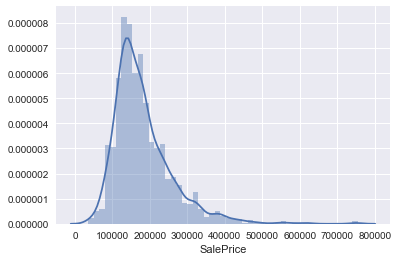

In [43]:
# Histogram
sns.distplot(df_train['SalePrice']);


In [44]:
# Skewness - a measure of the asymmetry
# Kurtosis - a measure of the "tailedness" 
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


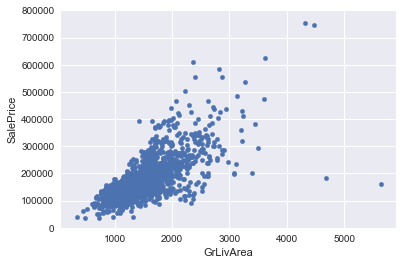

In [45]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

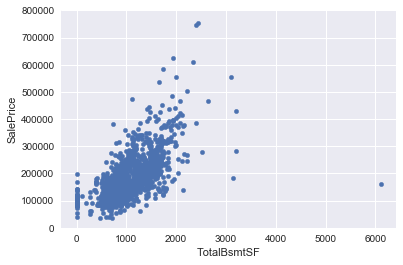

In [46]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

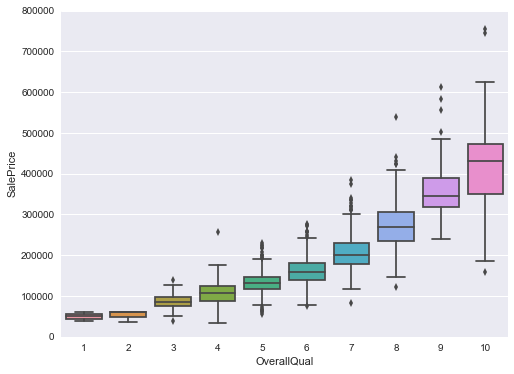

In [47]:
# Relationship with categorical features
#box plot overallqual/saleprice

var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

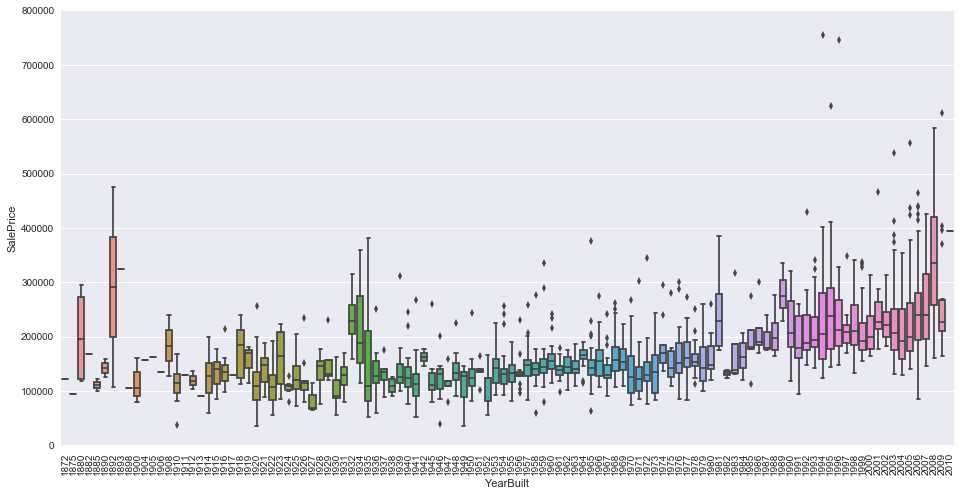

In [48]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

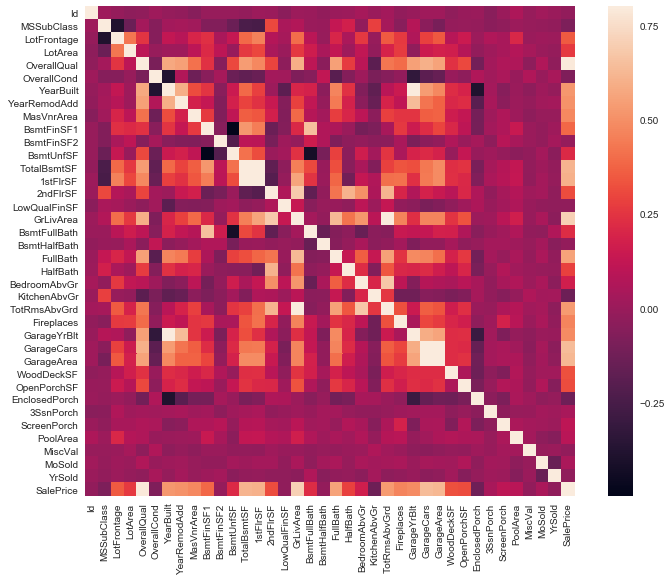

In [49]:
# Correlation Matrix - shows correlated variables (the ligher the color the more correlation)
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

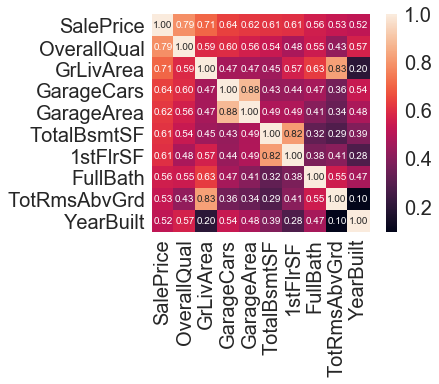

In [50]:
# Saleprice correlation matrix
# Shows k strongest correlation between Sale Price and other parameters
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=2)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
* 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and * 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
* 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' just to say that our first guess was right
* 'FullBath'
* 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
* 'YearBuilt'... It seems that 'YearBuilt' is slightly correlated with 'SalePrice'.

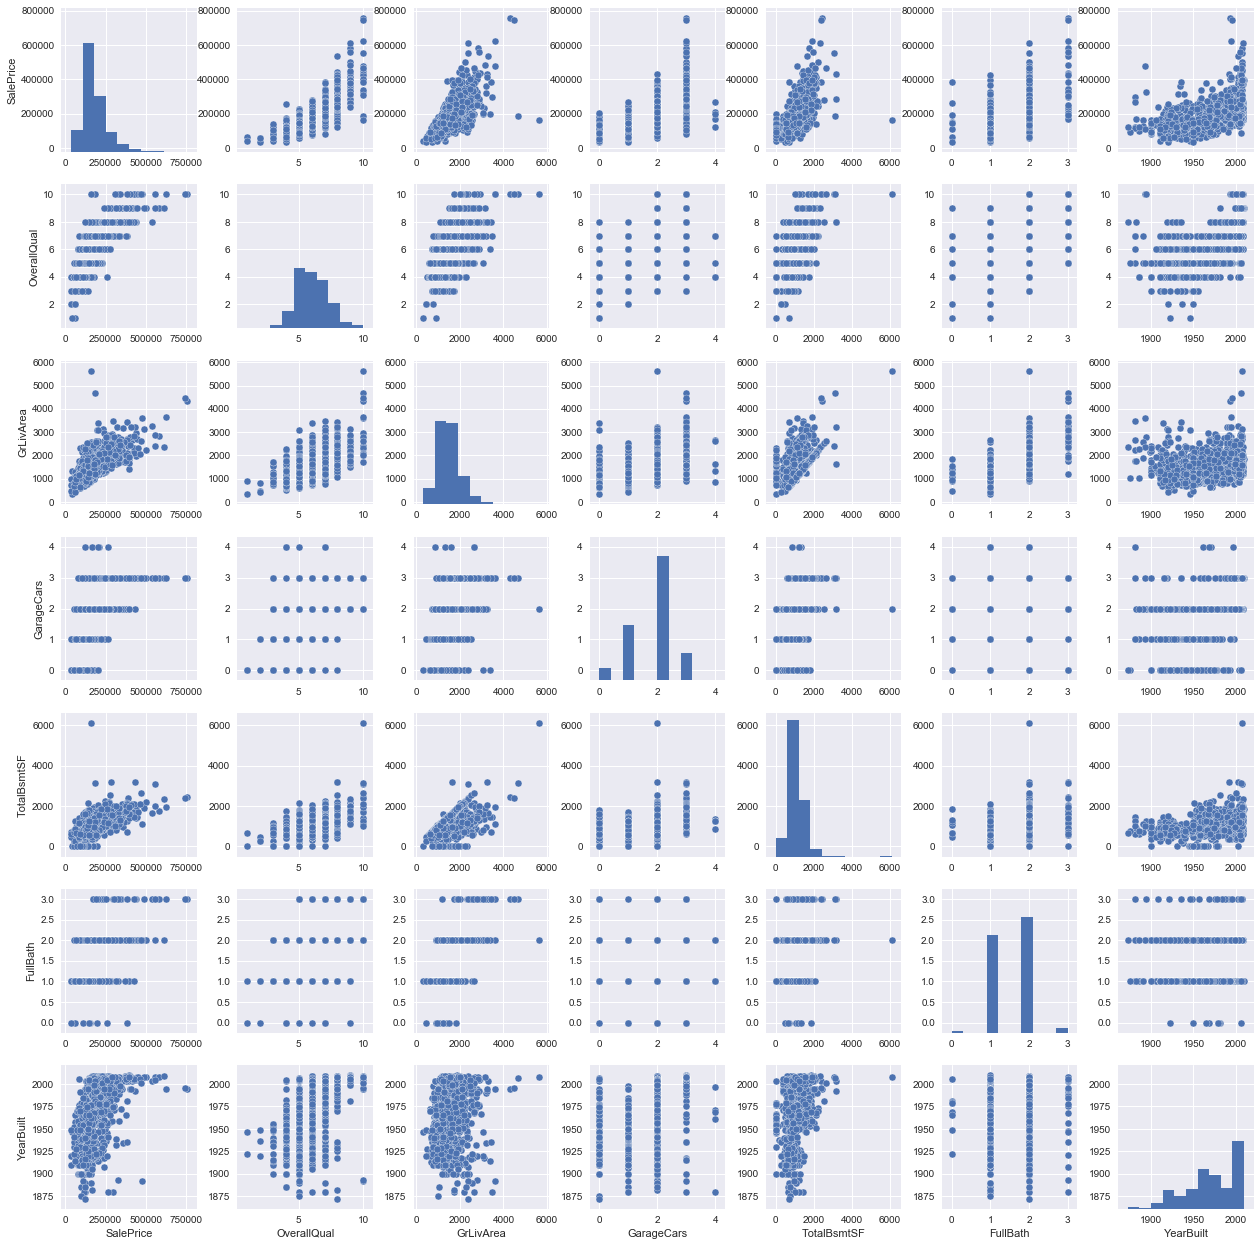

In [51]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [52]:
# Dealing with missing data
# df_train.isnull().sum() - does it by variable
# Delete a variable if more than 15% of data is missing
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [53]:

# Delete a variable if more than 15% of data is missing
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

In [54]:
# Outliers

#standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[ 3.82758058]
 [ 4.0395221 ]
 [ 4.49473628]
 [ 4.70872962]
 [ 4.728631  ]
 [ 5.06034585]
 [ 5.42191907]
 [ 5.58987866]
 [ 7.10041987]
 [ 7.22629831]]


* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.


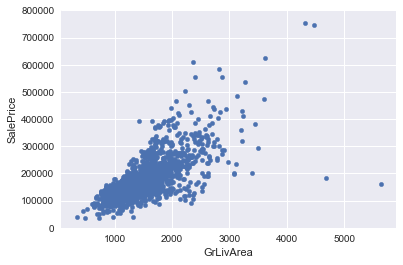

In [55]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [56]:
# Delete outliers:
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [57]:
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

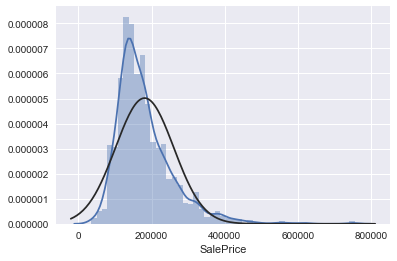

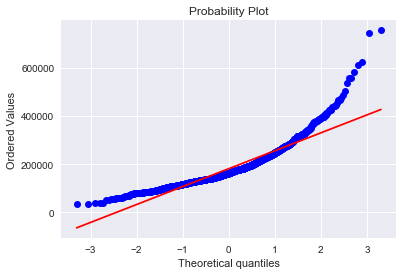

In [58]:
# Normality

#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

In [59]:
# in case of positive skewness, log transformations usually works well.
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])


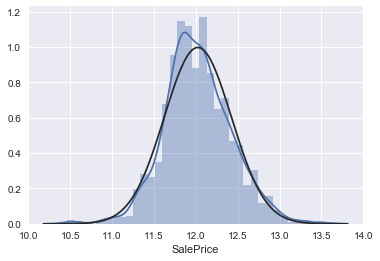

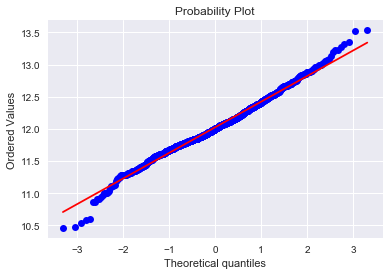

In [60]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

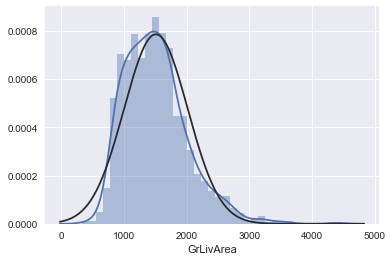

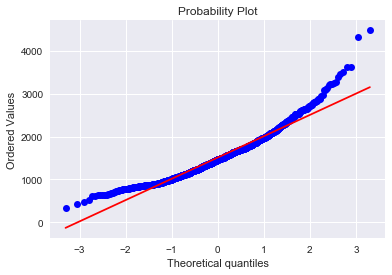

In [61]:
#histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [62]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

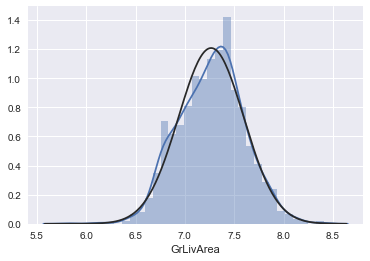

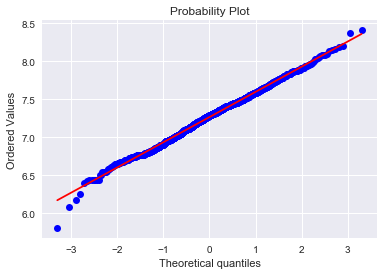

In [63]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

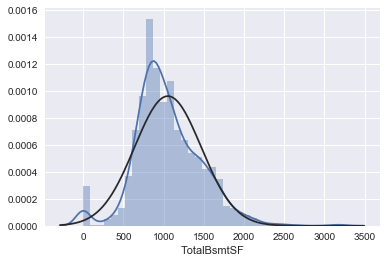

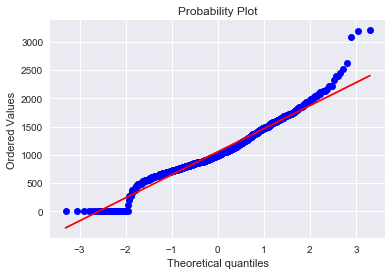

In [64]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

In [65]:
# Something that, in general, presents skewness.
# A significant number of observations with value zero (houses without basement).
# A big problem because the value zero doesn't allow us to do log transformations.

# To apply a log transformation here,
# we'll create a variable that can get the effect of having or not having basement (binary variable).
# Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. 
# This way we can transform data, without losing the effect of having or not basement.

#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [66]:
#transform data

df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])


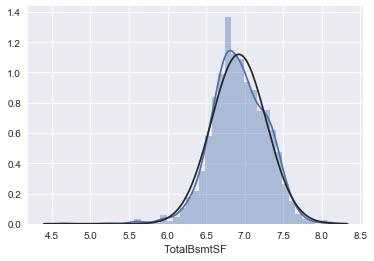

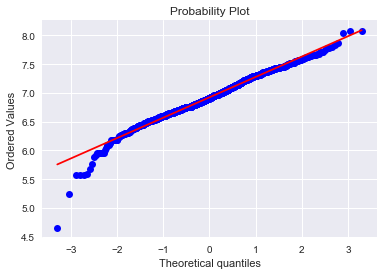

In [67]:
#histogram and normal probability plot
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

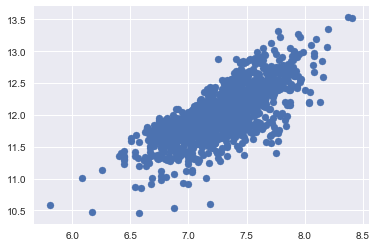

In [68]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

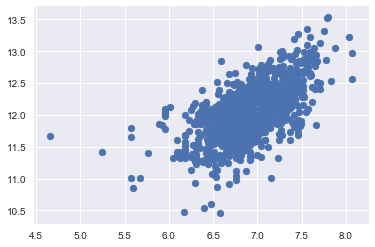

In [69]:
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!



In [70]:
#convert categorical variable into dummy
df_train = pd.get_dummies(df_train)
df_train

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0
5,6,50,14115,5,5,1993,1995,732,0,64,...,0,0,0,1,0,0,0,0,1,0
6,7,20,10084,8,5,2004,2005,1369,0,317,...,0,0,0,1,0,0,0,0,1,0
7,8,60,10382,7,6,1973,1973,859,32,216,...,0,0,0,1,0,0,0,0,1,0
8,9,50,6120,7,5,1931,1950,0,0,952,...,0,0,0,1,1,0,0,0,0,0
9,10,190,7420,5,6,1939,1950,851,0,140,...,0,0,0,1,0,0,0,0,1,0


In [74]:
predictors = ['OverallQual',
              'GrLivArea',
              'GarageCars',
              'TotalBsmtSF',
              'FullBath',
              'YearBuilt'
              ]

# ddd = pd.read_csv(main_file_path)
# print(ddd.SalePrice)

X = df_train[predictors]
print(X.describe())
y = df_train.SalePrice
# print(y)
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# labelencoder_utilities = LabelEncoder()
# utilities_column_index = X.columns.get_loc('OverallQual')
# X.loc[:, 'OverallQual'] = labelencoder_utilities.fit_transform(X.OverallQual)

# encoder = LabelEncoder()
# X.loc[:, 'KitchenQual'] = encoder.fit_transform(X.KitchenQual)

# onehotencoder = OneHotEncoder(categorical_features=[utilities_column_index])
# X = onehotencoder.fit_transform(X).toarray()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)


from xgboost import XGBRegressor
classifier = XGBRegressor()
classifier = XGBRegressor(colsample_bytree=0.7,
                          learning_rate=0.03,
                          max_depth=5,
                          min_child_weight=4,
                          n_estimators=500,
                          nthread=4,
                          objective='reg:linear',
                          silent=1,
                          subsample=0.7)
classifier.fit(X_train, y_train)

# for submitting:
# from xgboost import XGBRegressor
# classifier = XGBRegressor()
# classifier.fit(X, y)
from sklearn.model_selection import GridSearchCV


# brute force scan for all parameters, here are the tricks
# usually max_depth is 6,7,8
# learning rate is around 0.05, but small changes may make big diff
# tuning min_child_weight subsample colsample_bytree can have
# much fun of fighting against overfit
# n_estimators is how many round of boosting
# finally, ensemble xgboost with multiple seeds may reduce variance
# parameters = {'nthread': [4],  # when use hyperthread, xgboost may become slower
#               'objective': ['reg:linear'],
#               'learning_rate': [.03, 0.05, .07],  # so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# grid_search = GridSearchCV(classifier,
#                            parameters,
#                            cv=2,
#                            n_jobs=5,
#                            verbose=True)
# grid_search = grid_search.fit(X_train, y_train)
# best_accuracy = grid_search.best_score_
# best_parameters = grid_search.best_params_
# print(best_accuracy)
# print(best_parameters)


# from sklearn.metrics import mean_absolute_error
# y_pred = classifier.predict(X_test)
# print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))





# # Linear Regression
# from sklearn.linear_model import LinearRegression
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# # Predicting the Test set results
# y_pred = regressor.predict(X_test)
# from sklearn.metrics import mean_absolute_error
# y_pred = classifier.predict(X_test)
# print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))



# from sklearn.ensemble import RandomForestRegressor
# regressor = RandomForestRegressor(n_estimators=500, random_state=0)
# regressor.fit(X_train, y_train)
# # Predicting a new result
# y_pred = regressor.predict(X_test)
# print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
# 18982.4733517


# # --------
# # --------
# # Deep learning attempt
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# # define base model
# def baseline_model():
#     # create model
#     model = Sequential()
#     model.add(Dense(6, input_dim=6, kernel_initializer='normal', activation='relu'))
#     model.add(Dense(6, init='normal', activation='relu'))
#     model.add(Dense(1, kernel_initializer='normal'))
#     # Compile model
#     model.compile(loss='mean_squared_error', optimizer='adam')
#     return model

# from keras.wrappers.scikit_learn import KerasRegressor

# estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
# # Predicting the Test set results
# # y_pred = estimator.model.predict(X_test)
# estimator.fit(X_train, y_train)
# y_pred = estimator.predict(X_test)

# from sklearn.metrics import mean_absolute_error
# print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))
# Deep learning attempt end



from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l1
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train = X_train.dropna(axis=1)
X_train = StandardScaler().fit_transform(X_train)
model = Sequential()
#model.add(Dense(256, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(1, input_dim = X_train.shape[1], W_regularizer=l1(0.001)))

model.compile(loss = "mse", optimizer = "adam")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))

# print(np.exp(y_pred))
# best so far: 22689.104532320205
# with overall quality hot encoded: 21240.258963
# with overall quality hot encoded: 19229.0547945
# with YearRemodAdd: 18921.7343349

# After refactor and removing outliers 18530
# After grid search: 17721.7215994

# 18928 with removed var's
# 18928 with removed var's for linear regression as well





       OverallQual    GrLivArea   GarageCars  TotalBsmtSF     FullBath  \
count  1457.000000  1457.000000  1457.000000  1457.000000  1457.000000   
mean      6.094715     7.266042     1.765957     6.747838     1.563487   
std       1.376542     0.330502     0.747336     1.145003     0.549961   
min       1.000000     5.811141     0.000000     0.000000     0.000000   
25%       5.000000     7.028201     1.000000     6.679599     1.000000   
50%       6.000000     7.288928     2.000000     6.898715     2.000000   
75%       7.000000     7.482119     2.000000     7.167809     2.000000   
max      10.000000     8.406485     4.000000     8.072779     3.000000   

         YearBuilt  
count  1457.000000  
mean   1971.194235  
std      30.190353  
min    1872.000000  
25%    1954.000000  
50%    1972.000000  
75%    2000.000000  
max    2010.000000  
Epoch 1/1
1165/1165 [==============================] - 0s 222us/step - loss: 146.3229
178010.054795


In [40]:
print(mean_absolute_error(np.exp(y_test), np.exp(y_pred)))


52553.6071543
